In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

# 4. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [3]:
def feed_forward(data_in, w0,w1,w2, w3, b0,b1,b2,b3):
    '''
    The Feed-forward considers 5 layers including input and output layer.
    
    The output layer/neuron is a classification node.
    
    returns: state of each layer
    '''
    layer0 = data_in
    layer1 = tanh(np.dot(layer0, w0)+b0)
    layer2 = tanh(np.dot(layer1, w1)+b1)
    layer3 = tanh(np.dot(layer2, w2)+b2)
    layer4 = sigmoid(np.dot(layer3, w3)+b3)

    return layer0, layer1, layer2, layer3, layer4




In [4]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3,b0,b1,b2,b3, learning_rate):
    '''
    This backpropogate is only slightly different from a regular classifier
    in ways in which the output layer gradient is calculated.
    
    Since the output layer is not a function of any activation function,
    the delta doesn't need to be multiplied with the transfer derivative of the
    output layer.
    
    The rest is all the same.
    
    returns: weights and bias matrices
    '''
    l4_error = layer4 - actual_y
   
    l4_delta = l4_error * dsigmoid(layer4)
    dh4 = np.dot(layer3.T, l4_delta)
    
    l3_error = l4_delta.dot(w3.T)
    l3_delta = l3_error * dtanh(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * dtanh(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dtanh(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    
    b3 = b3 - (learning_rate * np.mean(l4_delta))
    b2 = b2 - (learning_rate * np.mean(l3_delta))
    b1 = b1 - (learning_rate * np.mean(l2_delta))
    b0 = b0 - (learning_rate * np.mean(l1_delta))    

    if i%10==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print("\n", int(i), loss)

        
    return w0, w1,w2,w3, b0,b1,b2,b3

In [5]:
def accuracy(testx, testy):
    correct = 0
    layer0, layer1, layer2, layer3, layer4 = feed_forward(testx,w0, w1,w2,w3, b0,b1,b2,b3)
    for i in range(len(testx)):
        if np.argmax(layer4[i]) == np.argmax(testy[i]):
            correct +=1 
            
    return f"Accuracy: {correct*100/len(testy)}%"


In [6]:
data2=pd.read_csv("adult.csv",names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target'])
data2.shape

(32561, 15)

In [7]:
data = data2.replace(' ?', np.nan).dropna()
data.shape

(30162, 15)

In [8]:
data.shape

(30162, 15)

In [9]:
features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'target']
#categorize
for column in features:
    data[column] = data[column].astype("category").cat.codes
#co relation    

In [10]:
final_data=data.drop(['education'],axis = 1)


In [11]:
X = np.array(final_data.drop(['target'],axis=1))
Y = np.array(final_data['target'])
nt=[]
for i in Y:
    op = [0,0]
    op[i] = 1
    nt.append(op)

X = (X-X.min()) / (X.max()-X.min())
xtrain, xtest, ytrain, ytest = train_test_split(X,nt, test_size=0.8)
xtrain


array([[3.03090513e-05, 3.36767237e-06, 1.83175782e-01, ...,
        0.00000000e+00, 2.69413789e-05, 2.55943100e-05],
       [1.68383618e-05, 1.34706895e-06, 4.50830300e-02, ...,
        0.00000000e+00, 2.69413789e-05, 2.55943100e-05],
       [1.27971550e-05, 0.00000000e+00, 1.45410031e-01, ...,
        0.00000000e+00, 6.73534473e-06, 2.55943100e-05],
       ...,
       [3.03090513e-05, 1.34706895e-06, 2.15660350e-01, ...,
        0.00000000e+00, 2.69413789e-05, 2.55943100e-05],
       [3.09825858e-05, 2.69413789e-06, 3.07775619e-01, ...,
        0.00000000e+00, 4.04120684e-05, 2.55943100e-05],
       [3.03090513e-05, 1.34706895e-06, 2.21565900e-02, ...,
        0.00000000e+00, 2.35737066e-05, 2.55943100e-05]])

In [12]:
loss_curve = []
iters = []
epochs = 10000


In [13]:
w0 = np.random.random((13,50))
w1 = np.random.random((50,30))
w2 = np.random.random((30, 5))
w3 = np.random.random((5,2))

b0 = np.random.random((1,1))-1
b1 = np.random.random((1,1))-1
b2 = np.random.random((1,1))-1
b3 = np.random.random((1,1))-1

In [14]:
for i in tqdm_notebook(range(epochs)):
    layer0, layer1, layer2, layer3, layer4 = feed_forward(xtrain, w0,w1,w2, w3, b0,b1,b2,b3)
    w0,w1,w2, w3, b0,b1,b2,b3 = backpropogate(i,layer0, layer1, layer2, layer3, layer4, ytrain, w0,w1,w2, w3, b0,b1,b2,b3, 0.01 )


 1000 0.25580234810655955

 2000 0.25580234763820414

 3000 0.25580234714968303

 4000 0.2558023458409432

 5000 0.2558023456608269

 6000 0.2558023448765259

 7000 0.25580234453247486

 8000 0.2558023439744775

 9000 0.25580234340170827



(0, 1000)

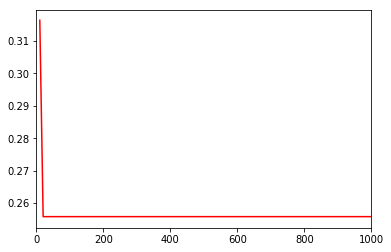

In [20]:
plt.plot(iters, loss_curve,'r')
plt.xlim(0,1000)

In [16]:
accuracy(xtrain, ytrain)

'Accuracy: 74.41976127320955%'

In [17]:
accuracy(xtest, ytest)

'Accuracy: 75.27973476999586%'